In [6]:
from rbm_test import fasta_read, get_checkpoint, get_beta_and_W, all_weights, RBM
from glob import glob
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [1]:
# Directory of Stored RBMs
mdir = "/mnt/D1/globus/pig_trained_rbms/"
rounds = ["b3", "n1", "np1", "np2", "np3"]
c1_rounds = [x+"_c1" for x in rounds]
c2_rounds = [x+"_c2" for x in rounds]

In [3]:
# Helper Functions for loading data and loading RBMs not in our current directory
def fetch_data(fasta_names, dir=""):
    data_dict = {}
    for x in fasta_names:
        seqs = fasta_read(dir + "/" + x +".fasta", drop_duplicates=True, seq_read_counts=False)
        data = pd.DataFrame({"sequence": seqs})
        data_dict[x] = data
    return data_dict

def get_checkpoint_path(round):
    ndir = mdir + round + "/"
    y = glob(ndir + "*/checkpoints/*.ckpt", recursive=False)[0]
    return y

In [4]:
# Stores all data in a dictionary ("data")
data = fetch_data(c1_rounds, dir="../pig_tissue")

# calculate likelihoods from last round rbm only
checkp = get_checkpoint_path("np3_c1")
rbm = RBM.load_from_checkpoint(checkp)
b3seqs, b3likeli = rbm.predict(data["b3_c1"])
n1seqs, n1likeli = rbm.predict(data["n1_c1"])
np1seqs, np1likeli = rbm.predict(data["np1_c1"])
np2seqs, np2likeli = rbm.predict(data["np2_c1"])
np3seqs, np3likeli = rbm.predict(data["np3_c1"])

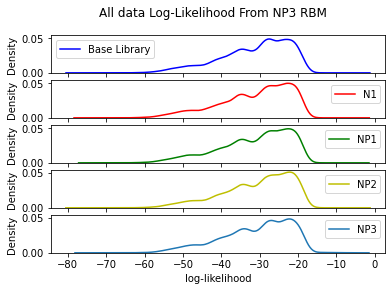

In [36]:
# assign likelihoods in new pd dataframe
data_fill = data.copy()
data_fill["b3_c1"]["likelihood"] = b3likeli
data_fill["n1_c1"]["likelihood"] = n1likeli
data_fill["np1_c1"]["likelihood"] = np1likeli
data_fill["np2_c1"]["likelihood"] = np2likeli
data_fill["np3_c1"]["likelihood"] = np3likeli

fig, axs = plt.subplots(5, 1, sharex=True, sharey=True)
p1 = sns.kdeplot(data_fill["b3_c1"].likelihood, shade=False, alpha=0.5, color="b", ax=axs[0], label="Base Library")
p2 = sns.kdeplot(data_fill["n1_c1"].likelihood, shade=False, alpha=0.5, color="r", ax=axs[1], label="N1")
p3 = sns.kdeplot(data_fill["np1_c1"].likelihood, shade=False, alpha=0.5, color="g", ax=axs[2], label="NP1")
p4 = sns.kdeplot(data_fill["np2_c1"].likelihood, shade=False, alpha=0.5, color="y", ax=axs[3], label="NP2")
p5 = sns.kdeplot(data_fill["np3_c1"].likelihood, shade=False, alpha=0.5, ax=axs[4], label="NP3")
fig.suptitle("All data Log-Likelihood From NP3 RBM")
p5.set(xlabel='log-likelihood')
p1.legend()
p2.legend()
p3.legend()
p4.legend()
p5.legend()


In [18]:
# Stores all data in a dictionary ("data")
b3_data = fetch_data(c1_rounds, dir="../pig_tissue")

# calculate likelihoods from last round rbm only
checkp = get_checkpoint_path("b3_c1")
rbm = RBM.load_from_checkpoint(checkp)
b3_b3seqs, b3_b3likeli = rbm.predict(data["b3_c1"])
b3_n1seqs, b3_n1likeli = rbm.predict(data["n1_c1"])
b3_np1seqs, b3_np1likeli = rbm.predict(data["np1_c1"])
b3_np2seqs, b3_np2likeli = rbm.predict(data["np2_c1"])
b3_np3seqs, b3_np3likeli = rbm.predict(data["np3_c1"])

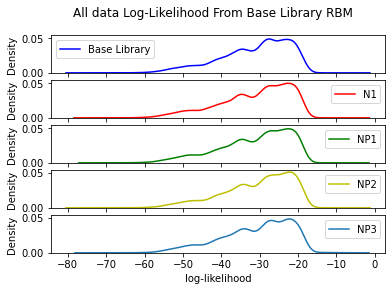

In [37]:
# assign likelihoods in new pd dataframe
b3_data_fill = b3_data.copy()
b3_data_fill["b3_c1"]["likelihood"] = b3_b3likeli
b3_data_fill["n1_c1"]["likelihood"] = b3_n1likeli
b3_data_fill["np1_c1"]["likelihood"] = b3_np1likeli
b3_data_fill["np2_c1"]["likelihood"] = b3_np2likeli
b3_data_fill["np3_c1"]["likelihood"] = b3_np3likeli

fig, axs = plt.subplots(5, 1, sharex=True, sharey=True)
p1 = sns.kdeplot(data_fill["b3_c1"].likelihood, shade=False, alpha=0.5, color="b", ax=axs[0], label="Base Library")
p2 = sns.kdeplot(data_fill["n1_c1"].likelihood, shade=False, alpha=0.5, color="r", ax=axs[1], label="N1")
p3 = sns.kdeplot(data_fill["np1_c1"].likelihood, shade=False, alpha=0.5, color="g", ax=axs[2], label="NP1")
p4 = sns.kdeplot(data_fill["np2_c1"].likelihood, shade=False, alpha=0.5, color="y", ax=axs[3], label="NP2")
p5 = sns.kdeplot(data_fill["np3_c1"].likelihood, shade=False, alpha=0.5, ax=axs[4], label="NP3")
fig.suptitle("All data Log-Likelihood From Base Library RBM")
p5.set(xlabel='log-likelihood')
p1.legend()
p2.legend()
p3.legend()
p4.legend()
p5.legend()

In [25]:
# find in common sequences
common = data["b3_c1"].merge(data["np3_c1"], on=['sequence'])
print("Common Sequences b3 & np3", common.shape[0])
common = data["b3_c1"].merge(data["np2_c1"], on=['sequence'])
print("Common Sequences b3 & np2", common.shape[0])
common = data["b3_c1"].merge(data["np1_c1"], on=['sequence'])
print("Common Sequences b3 & np1", common.shape[0])
common = data["b3_c1"].merge(data["n1_c1"], on=['sequence'])
print("Common Sequences b3 & n1", common.shape[0])

# All together
common = data["b3_c1"].merge(data["np3_c1"], on=['sequence'])
common1 = common.merge(data["np2_c1"])
common2 = common1.merge(data["np1_c1"])
common3 = common2.merge(data["n1_c1"])
common4 = data["np1_c1"].merge(data["np2_c1"].merge(data["np3_c1"]))
common5 = common4.merge(data["n1_c1"])
print("Common Sequences b3 & np3", common.shape[0])
print("Common Sequences b3 & np3 & np2", common1.shape[0])
print("Common Sequences b3 & np3 & np2 & np1", common2.shape[0])
print("Common Sequences b3 & np3 & np2 & np1 & n1", common3.shape[0])
print("Common Sequences np3 & np2 & np1 & n1", common5.shape[0])
print("Common Sequences np3 & np2 & np1", common4.shape[0])

Common Sequences b3 & np3 22794
Common Sequences b3 & np2 15037
Common Sequences b3 & np1 26164
Common Sequences b3 & n1 22417
Common Sequences b3 & np3 22794
Common Sequences b3 & np3 & np2 9895
Common Sequences b3 & np3 & np2 & np1 7376
Common Sequences b3 & np3 & np2 & np1 & n1 4443
Common Sequences np3 & np2 & np1 & n1 9894
Common Sequences np3 & np2 & np1 21806


###This

In [ ]:
data_c2 = fetch_data(c2_rounds, dir="../pig_tissue")

# calculate likelihoods from last round rbm only
checkp = get_checkpoint_path("np3_c1")
rbm = RBM.load_from_checkpoint(checkp)
b3seqs, b3likeli = rbm.predict(data["b3_c1"])
n1seqs, n1likeli = rbm.predict(data["n1_c1"])
np1seqs, np1likeli = rbm.predict(data["np1_c1"])
np2seqs, np2likeli = rbm.predict(data["np2_c1"])
np3seqs, np3likeli = rbm.predict(data["np3_c1"])